In [74]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt

In [60]:
def getX(length):
    toReturn = ""
    for i in range(length):
        toReturn += str(random.randint(0,1))
    return toReturn

In [61]:
def getS(n, d):
    xList = []
    yList = []
    
    for i in range(n):
        xList.append(getX(d))
        yList.append(random.randint(0,1))
    
    return list(zip(xList, yList))

In [62]:
def q_j(pair, j):
    #return 1 if the jth bit in some x equals the value of the corresponding y, 0 otherwise
    if (pair[0][j] == str(pair[1])):
        return 1
    else:
        return 0

In [63]:
def getGoodQJs(n,d, S):
    goodQJs = []
    
    #find c_j for each j in {1, ..., d}
    #iterate over j's first
    
    for j in range(d):
        sum = 0
       
        #iterate over pairs in S for each j
        for i in range(len(S)):
            sum += q_j(S[0], j)
            
        c_j = sum/n
        
        if c_j > ((1/2) + (1/math.sqrt(n))):
            goodQJs.append(j)
    return goodQJs

In [64]:
def h_x(x, y, n, d, S, QJs):
    #get set of good qjs
    #goodQJs = getGoodQJs(n,d,S)
    sum = 0
    
    #take votes from each qj on x
    for j in QJs:
        if x[j] == str(y):
            sum += 1
        else: 
            sum += 0
            
    #return 1 if a majority vote yes, 0 otherwise
    if sum >= (len(QJs)/2): 
        return 1
    else:
        return 0

In [65]:
def q_h(x, y, n, d, S, QJs):
    
        h_x_result = h_x(x, y, n, d, S, QJs)
        if h_x_result == y:
            return 1
        else: 
            return 0  


In [66]:
def get_err(n, d, S, QJs):
    #good_Qjs = getGoodQJs(n, d, S)
    q_h_total = 0
    i = 0
    
    for pairs in S: 
        q_h_total += q_h(S[i][0], S[i][1], n, d, S, QJs)
        i += 1
    
    return (q_h_total/n)

In [84]:
def testing_as_n_increases(n, d):
    S = getS(n, d)
    good_QJs = getGoodQJs(n, d, S)
    errors= []
    current_n = n
    currentQJs = []
    
    for i in range(n):
        
        for qj in good_QJs:
            if qj < current_n:
                currentQJs.append(qj)
            
        errors.append(get_err(current_n, d, S[:current_n], currentQJs))
        current_n += n
    
    return errors
    

In [101]:
def testing_as_d_increases(n, d): 
    current_d = d
    Errors = []
    
    for i in range(100): 
        S = getS(n,current_d)
        goodQJs = getGoodQJs(n, current_d, S)
        
        Errors.append(get_err(n, current_d, S, goodQJs))
        d = d*2
    
    return Errors
    

In [104]:
error_as_n_increases = testing_as_n_increases(15, 10)

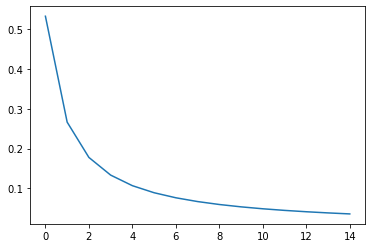

In [105]:
plt.plot(Errors)

In [106]:
error_as_d_increases = testing_as_d_increases(50, 3)

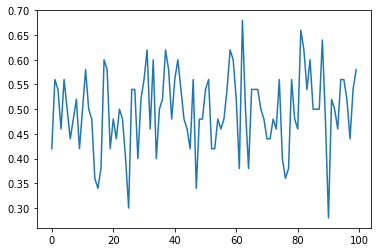

In [108]:
plt.plot(error_as_d_increases)